In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.max()

255

In [ ]:
x_train.min()

0

In [ ]:
#we convert the range from 0 to 255, to 0 to 1. 
# the formula to scale a value: scaled_value = (original_value – min) / (max – min). In our case, the minimum value is 0 and the maximum value is 255
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

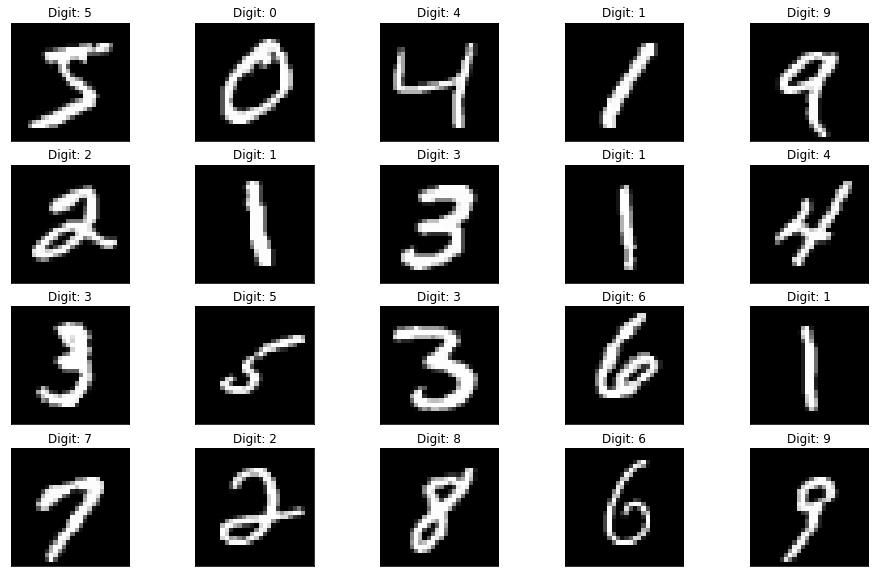

In [ ]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1) #a sub plot of 5 columns and 4 rows, then we pass the index of the image
    plt.imshow(image, cmap=plt.get_cmap('gray')) #display the array data as an image
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])


plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(x_train[i], y_train[i], plt, i)
    
plt.show()


In Computer Vision, we usually use 4 dimensions to represent a set of images:

The total number of images (we call this "batch size")
The width of each image
The height of each image
The number of channels of each image
As you saw before, our train set has 3 dimensions only; we are missing the number of channels. We need to transform our data by adding that fourth dimension. Since these images are grayscale, that fourth dimension will be 1.

We can use numpy's reshape() function to reshape all of the data by adding that extra dimension.

In [ ]:
x_train = x_train.reshape((x_train.shape +(1,)))
x_test = x_test.reshape((x_test.shape + (1,)))

In [ ]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

In [ ]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer, 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2393 - accuracy: 0.9275
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0816 - accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0509 - accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0358 - accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0267 - accuracy: 0.9918
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0203 - accuracy: 0.9938
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0146 - accuracy: 0.9957
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0110 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0072 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 33s 18m

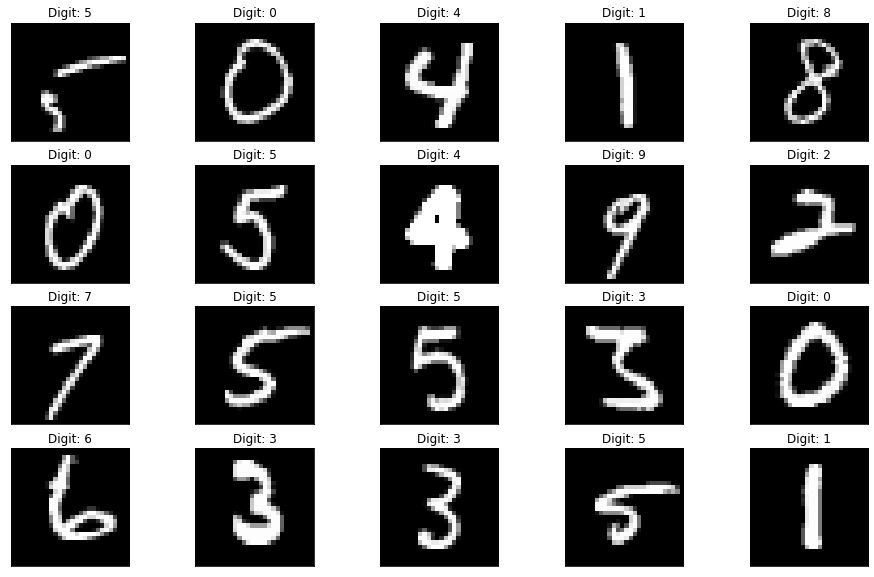

In [ ]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(x_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)

plt.show()